# Calibration analysis

In [1]:
import os
import re

import numpy as np
import pandas as pd

from snakemake.utils import Paramspace

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

## Read dataframe with simulation parameters

In [2]:
params = pd.read_csv('../params.csv')
params['outfile'] = [p + '.txt' for p in Paramspace(params).instance_patterns]

Filter for experiments with no causal GxE effect:

In [3]:
params = params.query('r0 == 0 or n_causal_gxe == 0').reset_index(drop=True)

Simulated were 100 SNPs for one gene, both with and without persistent genetic effect, for different environments.

In [4]:
params

,n_genes,n_snps,n_causal_g,n_causal_gxe,r0,v0,likelihood,normalize,cells_per_individual,env,d_env,outfile
0,1,100,100,0,0.0,0.1,gaussian,False,fixed,endo,10,n_genes~1/n_snps~100/n_causal_g~100/n_causal_g...
1,1,100,100,0,0.0,0.1,negbin,True,fixed,endo,10,n_genes~1/n_snps~100/n_causal_g~100/n_causal_g...
2,1,100,100,0,0.0,0.1,zinb,True,fixed,endo,10,n_genes~1/n_snps~100/n_causal_g~100/n_causal_g...
3,1,100,100,0,0.0,0.1,gaussian,False,fixed,cluster_uniform,5,n_genes~1/n_snps~100/n_causal_g~100/n_causal_g...
4,1,100,100,0,0.0,0.1,negbin,True,fixed,cluster_uniform,5,n_genes~1/n_snps~100/n_causal_g~100/n_causal_g...
5,1,100,100,0,0.0,0.1,zinb,True,fixed,cluster_uniform,5,n_genes~1/n_snps~100/n_causal_g~100/n_causal_g...
6,1,100,100,0,0.0,0.1,gaussian,False,fixed,cluster_biased,5,n_genes~1/n_snps~100/n_causal_g~100/n_causal_g...
7,1,100,100,0,0.0,0.1,negbin,True,fixed,cluster_biased,5,n_genes~1/n_snps~100/n_causal_g~100/n_causal_g...
8,1,100,100,0,0.0,0.1,zinb,True,fixed,cluster_biased,5,n_genes~1/n_snps~100/n_causal_g~100/n_causal_g...
9,1,100,100,0,0.0,0.1,gaussian,False,variable,endo,10,n_genes~1/n_snps~100/n_causal_g~100/n_causal_g...


## Plot quantile distribution

In [5]:
def qqplot(x, ax):
    (osm, osr), _ = probplot(x, dist='uniform')
    df = pd.DataFrame({'osm': -np.log10(osm), 'osr': -np.log10(osr)})
    sns.scatterplot(x='osm', y='osr', data=df, ax=ax, edgecolor=None, s=8)
    m = max(ax.get_xlim()[1], ax.get_ylim()[1])
    ax.plot([0, m], [0, m], c='grey')
    ax.set(xlabel=r'Expected $-\log_{10} P$', ylabel=r'Observed $-\log_{10} P$')

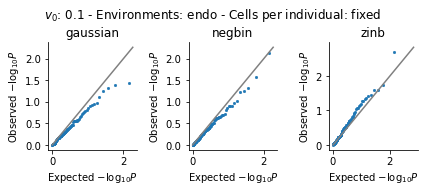

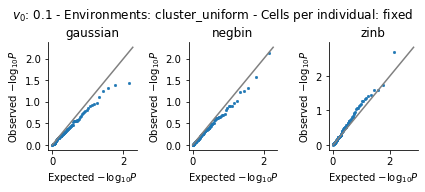

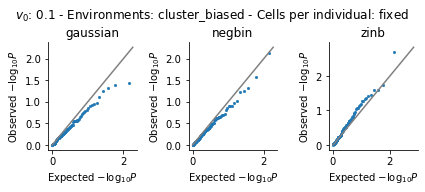

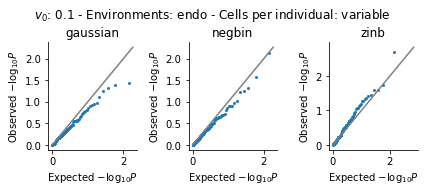

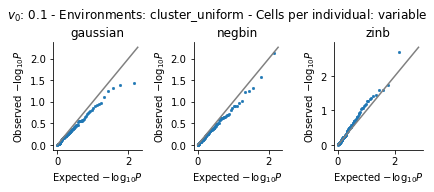

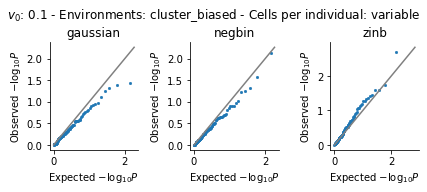

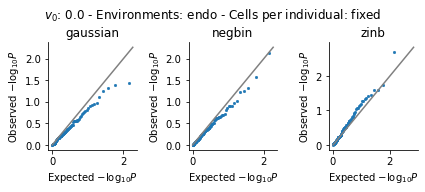

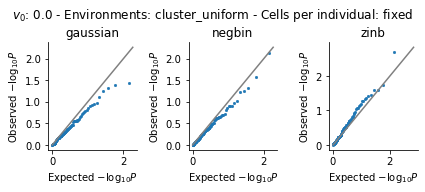

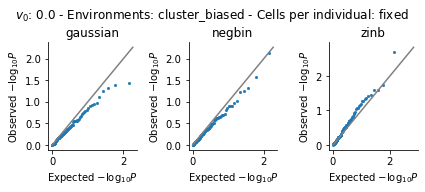

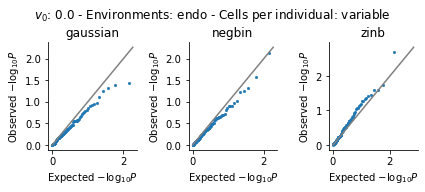

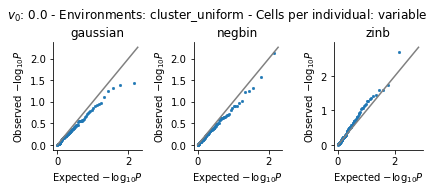

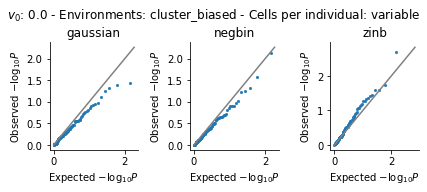

In [6]:
var_cols = ['v0', 'env', 'cells_per_individual']
var_cols_strs = ['$v_0$', 'Environments', 'Cells per individual']
likelihood_models = params['likelihood'].unique()

for i in params[var_cols].drop_duplicates().index:
    exp_parameters = params.loc[i]
    fig, axes = plt.subplots(1, 3, figsize=(6, 2.5))
    for i, lik in enumerate(likelihood_models):
        filename = re.sub('|'.join(likelihood_models), lik, params.loc[i, 'outfile'])
        fpath = '../results/simulations/' + filename
        if not os.path.exists(fpath): 
            print('%s not found (ignored)' % fpath)
        pvals = pd.read_csv(fpath, header=None).to_numpy().flatten()
        qqplot(pvals, axes[i])
        axes[i].set(title = lik)
    plt.tight_layout()
    title = ' - '.join(['%s: %s' % (i, j) for (i, j) in zip(var_cols_strs, exp_parameters[var_cols])])
    fig.suptitle(title, y=1.05)
    sns.despine()
    plt.show()
    plt.close()